<a href="https://colab.research.google.com/github/zainamri/Kelompok-3-/blob/main/Salinan_dari_Untitled22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

In [152]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/datasetbisa/olahdatakuisioner.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pemahaman Data

In [153]:
# Menampilkan data teratas
data.head()

,Jenis Kelamin,Usia,Status Pekerjaan,Penghasilan Bulanan,Lokasi Tempat Tinggal,Seberapa sering Anda membeli produk fashion melalui e-commerce?,Platform E-Commerce yang sering digunakan untuk membeli produk fashion,Seberapa penting bagi Anda untuk membaca ulasan produk sebelum membeli produk fashion di e-commerce?,Ulasan positif dari pelanggan lain membuat saya lebih yakin untuk membeli produk fashion.,Apakah Anda percaya bahwa ulasan produk yang banyak membantu dalam pengambilan keputusan Anda saat membeli produk fashion secara online?,...,Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.,Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya.,Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce.,"Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi.",Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce.,Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce.,Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce.,Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah.,Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.,Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi.
0,Laki - laki,18 - 22 Tahun,Berkerja,Rp2.000.000 - Rp4.000.000,Kota Besar,Kadang-Kadang,Shopee,5,5,5,...,5,5,5,5,5,5,3,5,5,5
1,Laki - laki,18 - 22 Tahun,Berkerja,Rp4.000.000 - Rp6.000.000,Kota Menengah,Kadang-Kadang,Shopee,5,5,4,...,4,4,4,5,4,4,3,4,4,4
2,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Kurang dari Rp2.000.000,Kota Besar,Cukup Sering,Shopee,5,5,5,...,5,5,5,4,3,4,4,5,4,4
3,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Tidak Bekerja,Kota Besar,Kadang-Kadang,Tokopedia,4,3,3,...,3,5,5,3,2,5,4,3,5,4
4,Laki - laki,18 - 22 Tahun,Pelajar/Mahasiswa,Tidak Bekerja,Kota Kecil/ Kabupaten,Kadang-Kadang,Shopee,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [154]:
# Menampilkan Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                               --------------  ----- 
 0   Jenis Kelamin                                                                                                                                        200 non-null    object
 1   Usia                                                                                                                                                 200 non-null    object
 2   Status Pekerjaan                                                                                                                                     200 non-null    object
 3   Pengh

Pembersihan Data

In [155]:
# Identifikasi dan tangani missing values jika ada
print(data.isnull().sum())

Jenis Kelamin                                                                                                                                          0
Usia                                                                                                                                                   0
Status Pekerjaan                                                                                                                                       0
Penghasilan Bulanan                                                                                                                                    0
Lokasi Tempat Tinggal                                                                                                                                  0
Seberapa sering Anda membeli produk fashion melalui e-commerce?                                                                                        0
Platform E-Commerce yang sering digunakan untuk membeli produk fashion            

In [156]:
# Mengganti nama kolom
data.rename(columns={ 'Seberapa sering Anda membeli produk fashion melalui e-commerce?': 'Seberapa sering',
                      'Platform E-Commerce yang sering digunakan untuk membeli produk fashion': 'Platform E-Commerce'
}, inplace=True)
# Mengganti nama kolom untuk variabel independen
data.rename(columns={
    'Seberapa penting bagi Anda untuk membaca ulasan produk sebelum membeli produk fashion di e-commerce?': 'X101',
    'Ulasan positif dari pelanggan lain membuat saya lebih yakin untuk membeli produk fashion.': 'X102',
    'Apakah Anda percaya bahwa ulasan produk yang banyak membantu dalam pengambilan keputusan Anda saat membeli produk fashion secara online?': 'X103',
    'Saya lebih cenderung membeli produk fashion jika ulasan yang ada memberikan informasi yang detail tentang kualitas dan fit produk.': 'X104',
    'Harga produk fashion adalah faktor yang sangat mempengaruhi keputusan saya dalam berbelanja di e-commerce.': 'X201',
    'Saya lebih memilih produk fashion yang sedang diskon atau memiliki penawaran harga menarik di e-commerce.': 'X202',
    'Harga produk di e-commerce seringkali menjadi pertimbangan utama saya dibandingkan dengan kualitas produk itu sendiri.': 'X203',
    'Saya merasa bahwa harga produk fashion di e-commerce sering lebih terjangkau dibandingkan dengan harga di toko fisik.': 'X204',
    'Saya lebih tertarik membeli produk fashion yang harganya sesuai dengan kualitas yang ditawarkan, meskipun harga sedikit lebih tinggi.': 'X205',
    'Saya lebih cenderung membeli produk fashion dengan rating tinggi (4 bintang ke atas) di e-commerce.': 'X301',
    'Rating produk yang tinggi menunjukkan bahwa produk tersebut berkualitas baik dan dapat dipercaya.': 'X302',
    'Saya selalu melihat rating produk terlebih dahulu sebelum memutuskan untuk membeli produk fashion di e-commerce.': 'X303',
    'Saya merasa lebih percaya membeli produk fashion yang memiliki rating tinggi dibandingkan yang memiliki rating rendah, meskipun harga lebih tinggi.': 'X304',
    'Saya tidak akan membeli produk dengan rating rendah meskipun harganya menarik di e-commerce.': 'X305'
}, inplace=True)

# Mengganti nama kolom untuk variabel dependen
data.rename(columns={
    'Saya merasa lebih tertarik membeli produk fashion setelah membaca ulasan positif dari pelanggan lain di e-commerce.': 'Y1',
    'Harga yang terjangkau membuat saya lebih tertarik untuk membeli produk fashion melalui e-commerce.': 'Y2',
    'Saya lebih tertarik membeli produk fashion yang memiliki rating tinggi di e-commerce dibandingkan dengan produk yang memiliki rating rendah.': 'Y3',
    'Saya merasa lebih yakin membeli produk fashion jika produk tersebut memiliki banyak ulasan positif dan rating tinggi.': 'Y4',
    'Saya akan lebih cenderung membeli produk fashion yang harganya sesuai dengan kualitas dan memiliki rating tinggi.': 'Y5'
}, inplace=True)


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jenis Kelamin          200 non-null    object
 1   Usia                   200 non-null    object
 2   Status Pekerjaan       200 non-null    object
 3   Penghasilan Bulanan    200 non-null    object
 4   Lokasi Tempat Tinggal  200 non-null    object
 5   Seberapa sering        200 non-null    object
 6   Platform E-Commerce    200 non-null    object
 7   X101                   200 non-null    int64 
 8   X102                   200 non-null    int64 
 9   X103                   200 non-null    int64 
 10  X104                   200 non-null    int64 
 11  X201                   200 non-null    int64 
 12  X202                   200 non-null    int64 
 13  X203                   200 non-null    int64 
 14  X204                   200 non-null    int64 
 15  X205                   

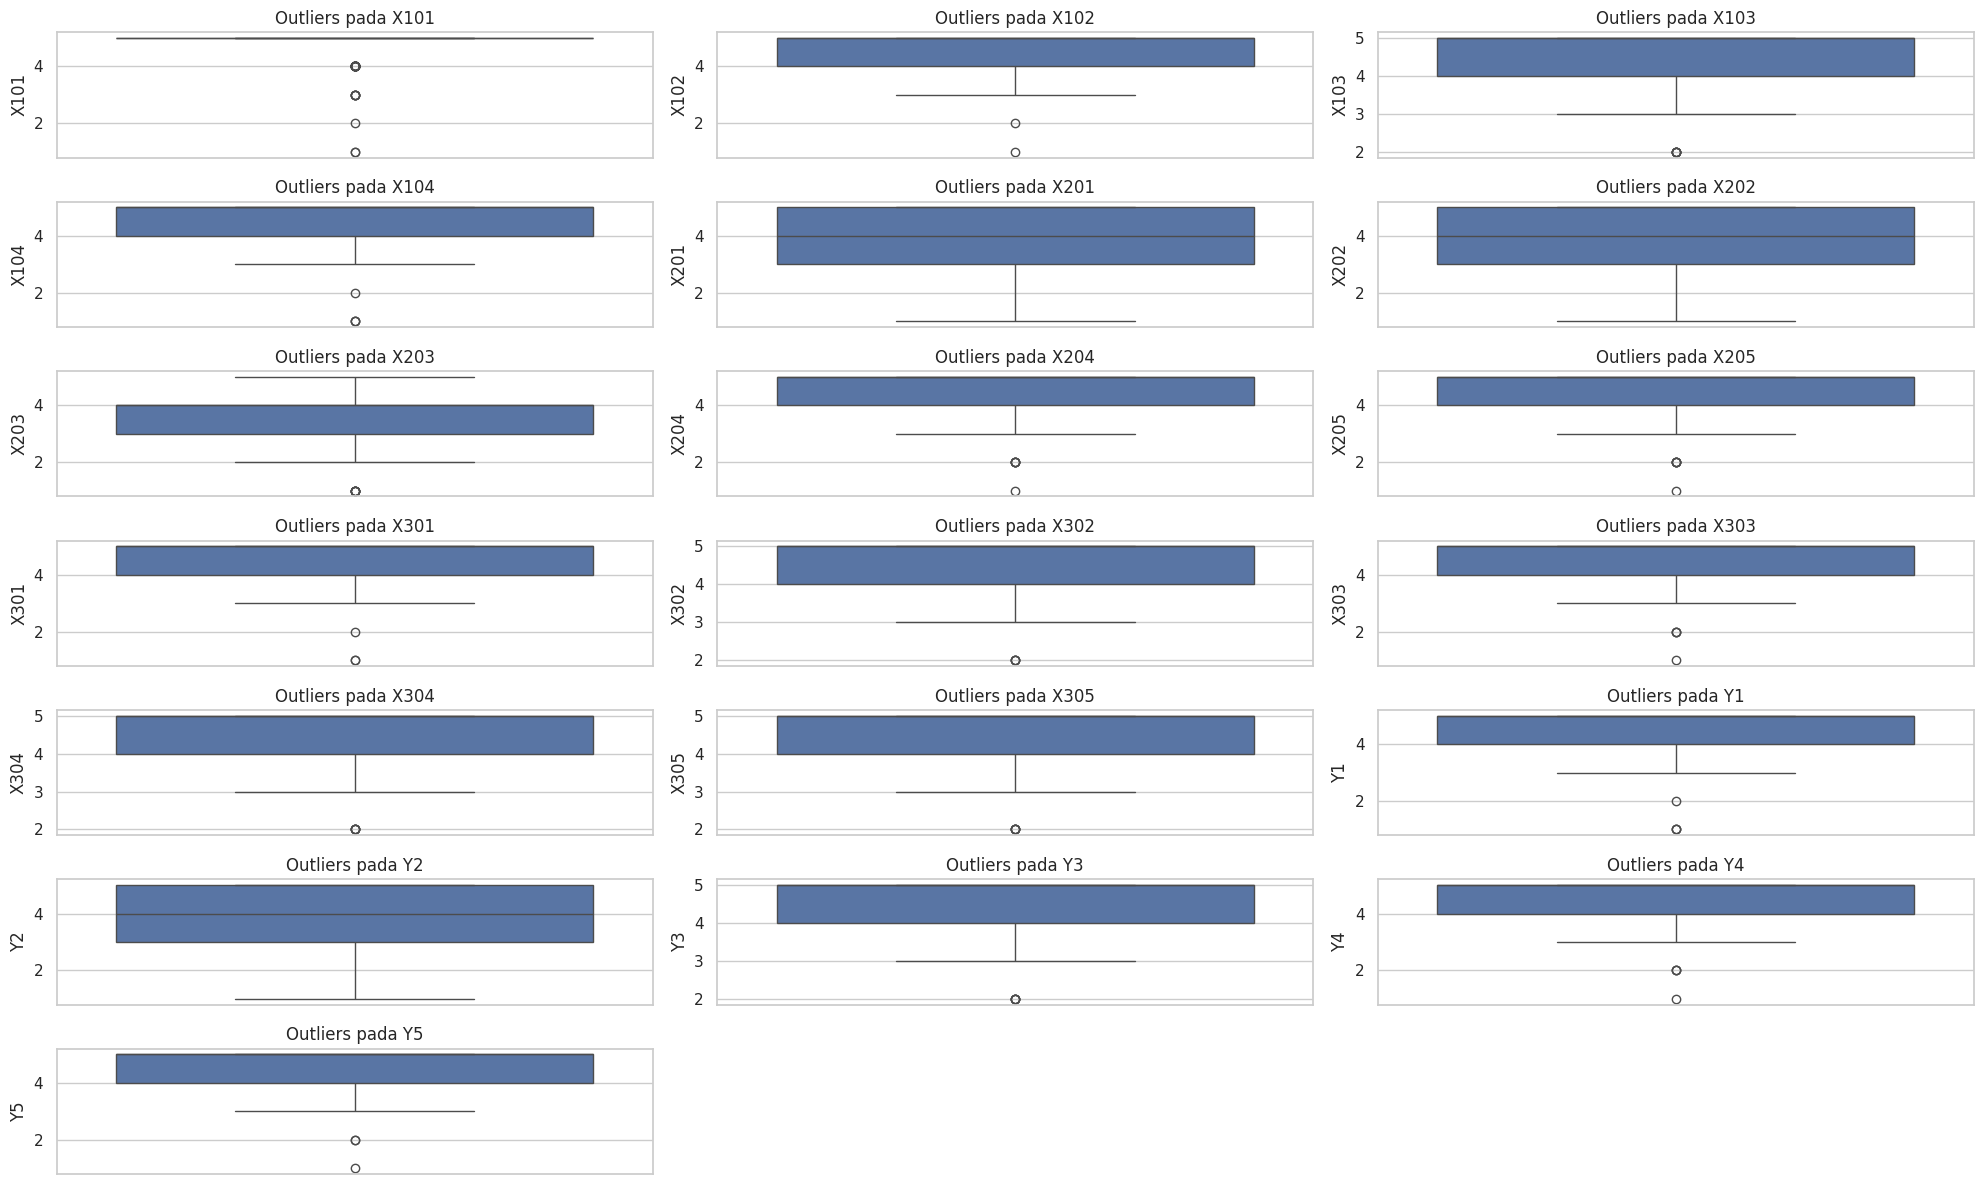

In [158]:
import math

# Mengambil semua kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah kolom dan baris untuk subplot
num_cols = 3  # Jumlah kolom yang diinginkan
num_rows = math.ceil(len(numeric_cols) / num_cols)  # Menghitung jumlah baris

# Visualisasi boxplot untuk mendeteksi outliers pada semua kolom numerik
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers pada {col}')

plt.tight_layout()
plt.show()

In [159]:
# Fungsi untuk mengidentifikasi dan mengimputasi outliers dengan median
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()

    # Mengganti outliers dengan median
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

# Mengatasi outliers untuk semua kolom X dan Y
for column in data.columns[6:]:  # Mengambil kolom X dan Y
    if pd.api.types.is_numeric_dtype(data[column]):
        handle_outliers(data, column)

# Menampilkan data setelah penanganan outliers
data.describe()

,X101,X102,X103,X104,X201,X202,X203,X204,X205,X301,X302,X303,X304,X305,Y1,Y2,Y3,Y4,Y5
count,200.0,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000
mean,5.0,4.635000,4.475000,4.690000,3.995000,4.0700,3.620000,4.39000,4.480000,4.700000,4.500000,4.630000,4.435000,4.445000,4.5050,4.050000,4.525000,4.560000,4.540000
std,0.0,0.602987,0.679473,0.579291,0.953689,0.9216,1.025112,0.74206,0.672205,0.530478,0.634043,0.595713,0.698725,0.768066,0.6419,0.944436,0.649217,0.623171,0.656165
min,5.0,3.000000,3.000000,3.000000,1.000000,1.0000,2.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0000,1.000000,3.000000,3.000000,3.000000
25%,5.0,4.000000,4.000000,4.750000,3.000000,3.0000,3.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,3.000000,4.000000,4.000000,4.000000
50%,5.0,5.000000,5.000000,5.000000,4.000000,4.0000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.000000,5.000000,5.000000
75%,5.0,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000
max,5.0,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000


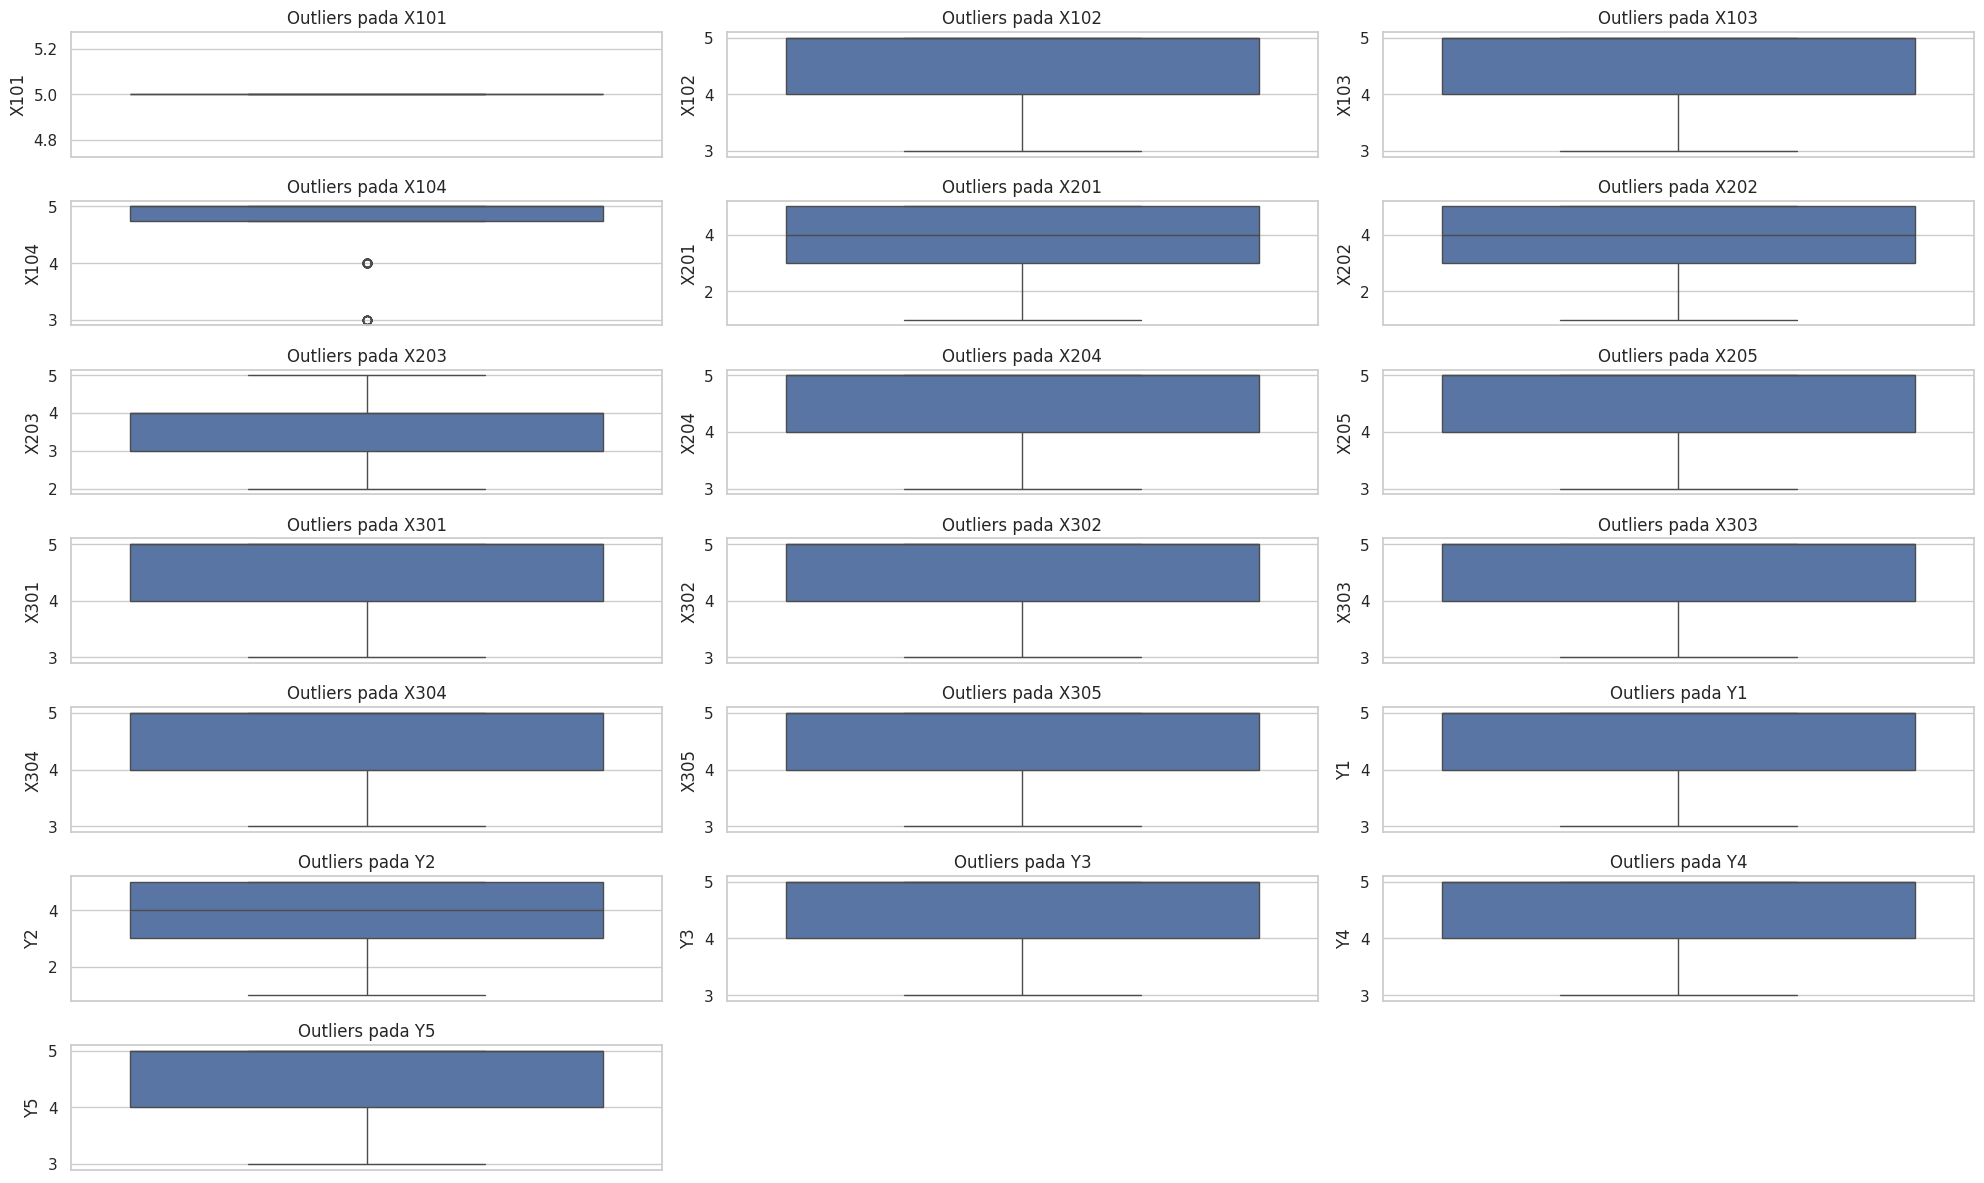

In [160]:
import math

# Mengambil semua kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah kolom dan baris untuk subplot
num_cols = 3  # Jumlah kolom yang diinginkan
num_rows = math.ceil(len(numeric_cols) / num_cols)  # Menghitung jumlah baris

# Visualisasi boxplot untuk mendeteksi outliers pada semua kolom numerik
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Outliers pada {col}')

plt.tight_layout()
plt.show()

<ipython-input-161-c23ffcd4e7b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jenis Kelamin', data=data, palette='pastel')


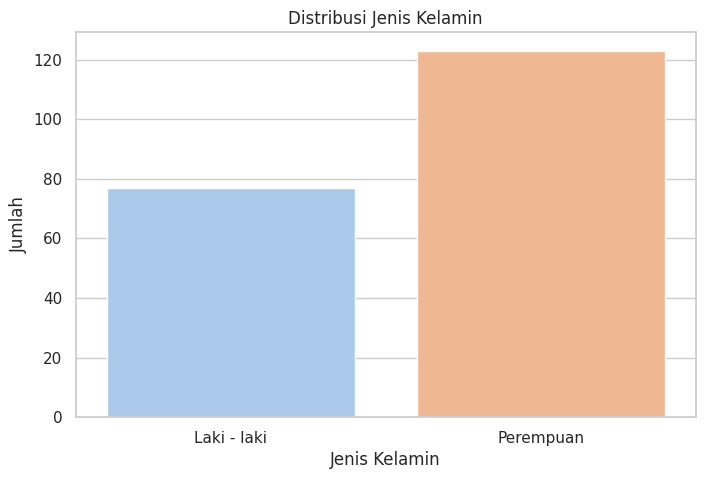

<ipython-input-161-c23ffcd4e7b2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Usia', data=data, palette='pastel')


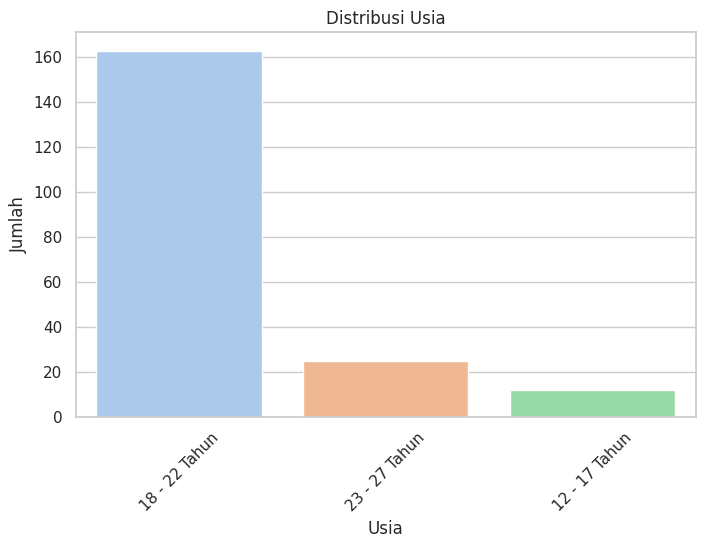

<ipython-input-161-c23ffcd4e7b2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status Pekerjaan', data=data, palette='pastel')


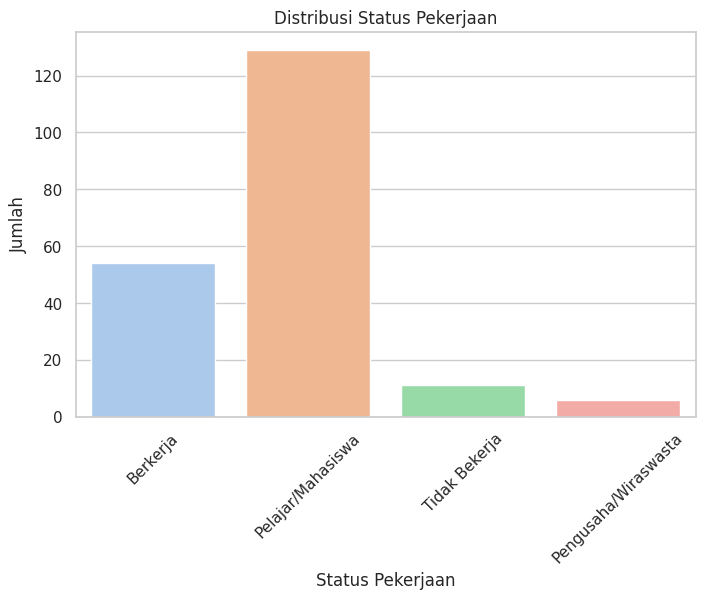

<ipython-input-161-c23ffcd4e7b2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Lokasi Tempat Tinggal', data=data, palette='pastel')


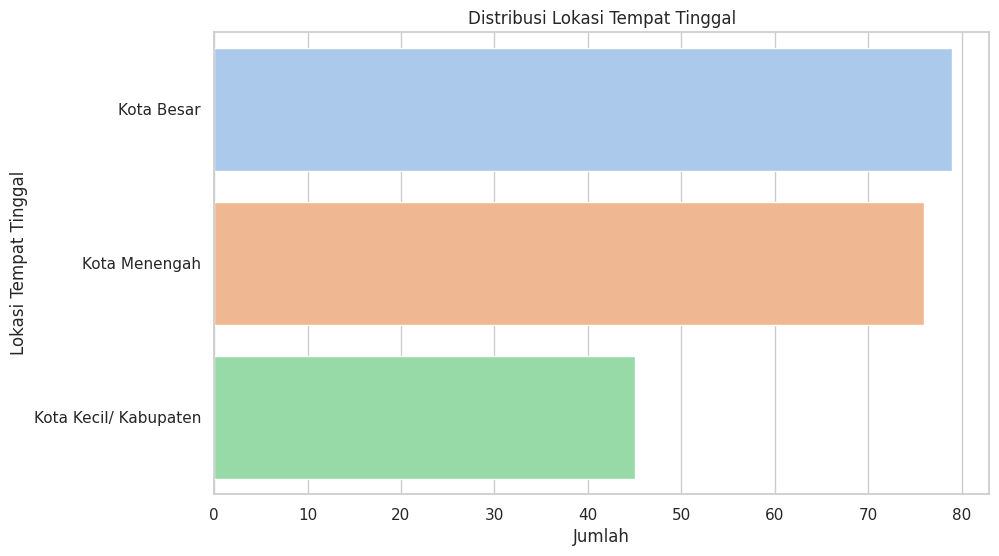

In [161]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# 1. Analisis Jenis Kelamin
plt.figure(figsize=(8, 5))
sns.countplot(x='Jenis Kelamin', data=data, palette='pastel')
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

# 2. Analisis Usia
plt.figure(figsize=(8, 5))
sns.countplot(x='Usia', data=data, palette='pastel')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# 3. Analisis Status Pekerjaan
plt.figure(figsize=(8, 5))
sns.countplot(x='Status Pekerjaan', data=data, palette='pastel')
plt.title('Distribusi Status Pekerjaan')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# 4. Analisis Lokasi Tempat Tinggal
plt.figure(figsize=(10, 6))
sns.countplot(y='Lokasi Tempat Tinggal', data=data, palette='pastel')
plt.title('Distribusi Lokasi Tempat Tinggal')
plt.xlabel('Jumlah')
plt.ylabel('Lokasi Tempat Tinggal')
plt.show()

# 3. Analisis Deskriptif  


In [162]:
# Hitung statistik deskriptif
data.describe()

,X101,X102,X103,X104,X201,X202,X203,X204,X205,X301,X302,X303,X304,X305,Y1,Y2,Y3,Y4,Y5
count,200.0,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000
mean,5.0,4.635000,4.475000,4.690000,3.995000,4.0700,3.620000,4.39000,4.480000,4.700000,4.500000,4.630000,4.435000,4.445000,4.5050,4.050000,4.525000,4.560000,4.540000
std,0.0,0.602987,0.679473,0.579291,0.953689,0.9216,1.025112,0.74206,0.672205,0.530478,0.634043,0.595713,0.698725,0.768066,0.6419,0.944436,0.649217,0.623171,0.656165
min,5.0,3.000000,3.000000,3.000000,1.000000,1.0000,2.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0000,1.000000,3.000000,3.000000,3.000000
25%,5.0,4.000000,4.000000,4.750000,3.000000,3.0000,3.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000,3.000000,4.000000,4.000000,4.000000
50%,5.0,5.000000,5.000000,5.000000,4.000000,4.0000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.000000,5.000000,5.000000
75%,5.0,5.000000,5.000000,5.000000,5.000000,5.0000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000
max,5.0,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000


In [163]:
# Membuat DataFrame untuk variabel independen
customer_review = data[['X101', 'X102', 'X103', 'X104']]

harga = data[['X201', 'X202', 'X203', 'X204', 'X205']]

customer_rating = data[['X301', 'X302', 'X303', 'X304', 'X305']]

# Membuat DataFrame untuk variabel dependen
minat_beli = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']]

# Menggabungkan semua DataFrame menjadi satu DataFrame utama
final_data = pd.concat([customer_review, harga, customer_rating, minat_beli], axis=1)

# Menampilkan DataFrame akhir
final_data.head()

,X101,X102,X103,X104,X201,X202,X203,X204,X205,X301,X302,X303,X304,X305,Y1,Y2,Y3,Y4,Y5
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0
1,5.0,5.0,4.0,5.0,3.0,2.0,3.0,3.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0
2,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0
3,5.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,5.0,4.0,3.0,5.0,4.0
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


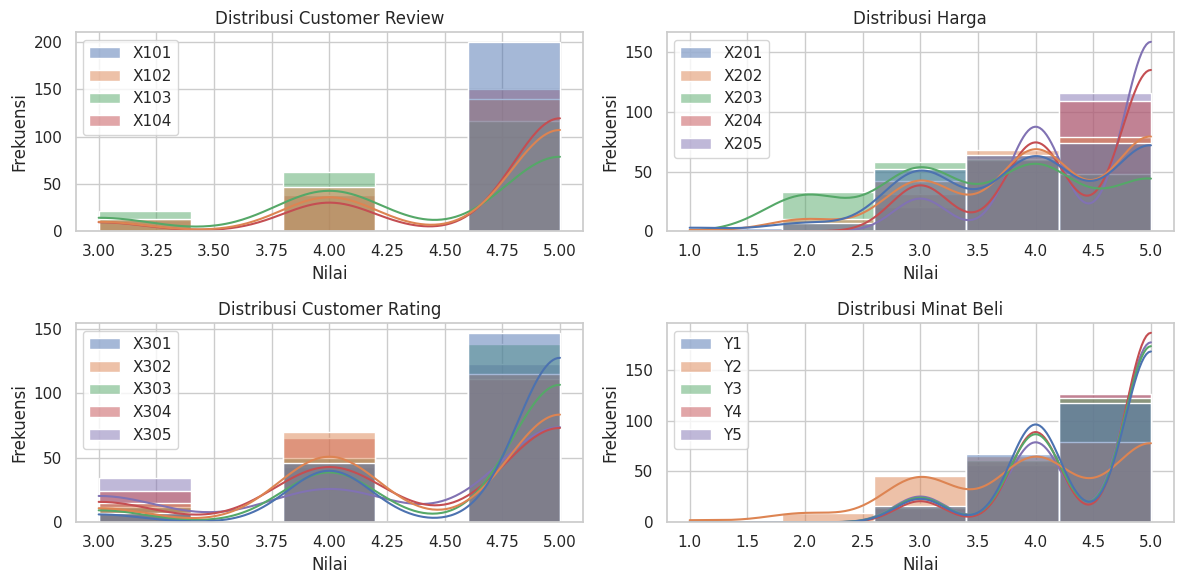

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data menggunakan histogram
plt.figure(figsize=(12, 6))

# Histogram untuk variabel independen (customer review)
plt.subplot(2, 2, 1)
sns.histplot(final_data[['X101', 'X102', 'X103', 'X104']], bins=5, kde=True)
plt.title('Distribusi Customer Review')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Histogram untuk variabel harga
plt.subplot(2, 2, 2)
sns.histplot(final_data[['X201', 'X202', 'X203', 'X204', 'X205']], bins=5, kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Histogram untuk variabel customer rating
plt.subplot(2, 2, 3)
sns.histplot(final_data[['X301', 'X302', 'X303', 'X304', 'X305']], bins=5, kde=True)
plt.title('Distribusi Customer Rating')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

# Histogram untuk variabel minat beli
plt.subplot(2, 2, 4)
sns.histplot(final_data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']], bins=5, kde=True)
plt.title('Distribusi Minat Beli')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan 'final_data' adalah DataFrame yang sudah ada
# Menghitung total untuk customer review
final_data['Total_Customer_Review'] = final_data[['X101', 'X102', 'X103', 'X104']].sum(axis=1)

# Menghitung total untuk harga
final_data['Total_Harga'] = final_data[['X201', 'X202', 'X203', 'X204', 'X205']].sum(axis=1)

# Menghitung total untuk customer rating
final_data['Total_Customer_Rating'] = final_data[['X301', 'X302', 'X303', 'X304', 'X305']].sum(axis=1)

# Menghitung total untuk minat beli
final_data['Total_Minat_Beli'] = final_data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].sum(axis=1)

# Menampilkan DataFrame dengan kolom total
print(final_data[['Total_Customer_Review', 'Total_Harga', 'Total_Customer_Rating', 'Total_Minat_Beli']].head())


   Total_Customer_Review  Total_Harga  Total_Customer_Rating  Total_Minat_Beli
0                   20.0         25.0                   25.0              23.0
1                   19.0         16.0                   21.0              19.0
2                   20.0         21.0                   22.0              21.0
3                   15.0         24.0                   21.0              21.0
4                   20.0         23.0                   25.0              25.0


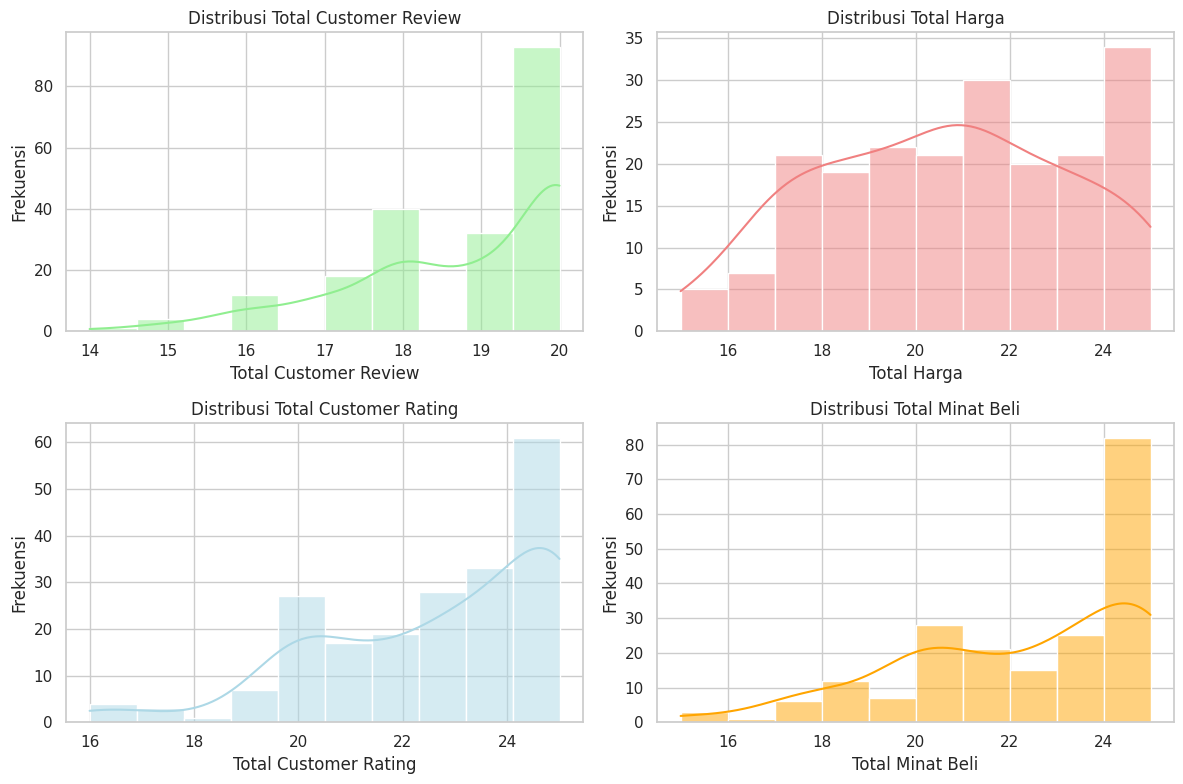

In [166]:
# Visualisasi distribusi total menggunakan histogram
plt.figure(figsize=(12, 8))

# Histogram untuk Total Customer Review
plt.subplot(2, 2, 1)
sns.histplot(final_data['Total_Customer_Review'], bins=10, kde=True, color='lightgreen')
plt.title('Distribusi Total Customer Review')
plt.xlabel('Total Customer Review')
plt.ylabel('Frekuensi')

# Histogram untuk Total Harga
plt.subplot(2, 2, 2)
sns.histplot(final_data['Total_Harga'], bins=10, kde=True, color='lightcoral')
plt.title('Distribusi Total Harga')
plt.xlabel('Total Harga')
plt.ylabel('Frekuensi')

# Histogram untuk Total Customer Rating
plt.subplot(2, 2, 3)
sns.histplot(final_data['Total_Customer_Rating'], bins=10, kde=True, color='lightblue')
plt.title('Distribusi Total Customer Rating')
plt.xlabel('Total Customer Rating')
plt.ylabel('Frekuensi')

# Histogram untuk Total Minat Beli
plt.subplot(2, 2, 4)
sns.histplot(final_data['Total_Minat_Beli'], bins=10, kde=True, color='orange')
plt.title('Distribusi Total Minat Beli')
plt.xlabel('Total Minat Beli')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Jenis Kelamin          200 non-null    object 
 1   Usia                   200 non-null    object 
 2   Status Pekerjaan       200 non-null    object 
 3   Penghasilan Bulanan    200 non-null    object 
 4   Lokasi Tempat Tinggal  200 non-null    object 
 5   Seberapa sering        200 non-null    object 
 6   Platform E-Commerce    200 non-null    object 
 7   X101                   200 non-null    float64
 8   X102                   200 non-null    float64
 9   X103                   200 non-null    float64
 10  X104                   200 non-null    float64
 11  X201                   200 non-null    float64
 12  X202                   200 non-null    float64
 13  X203                   200 non-null    float64
 14  X204                   200 non-null    float64
 15  X205  

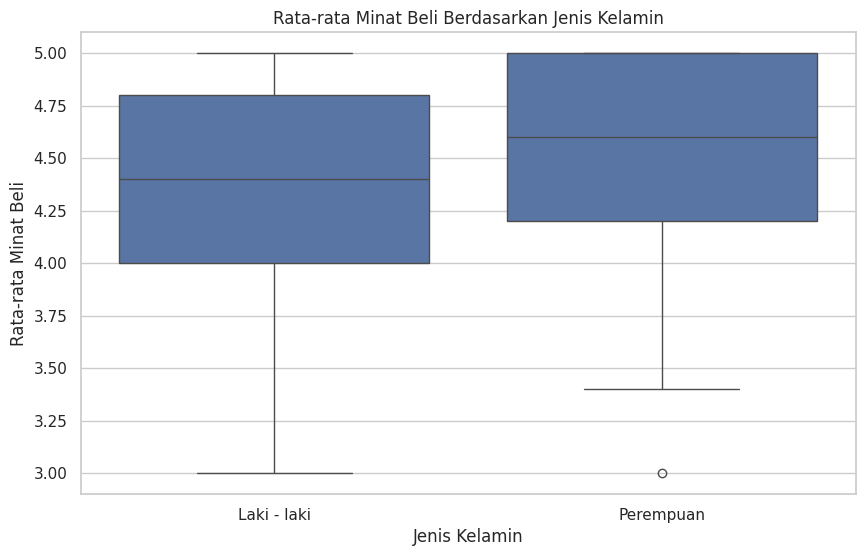

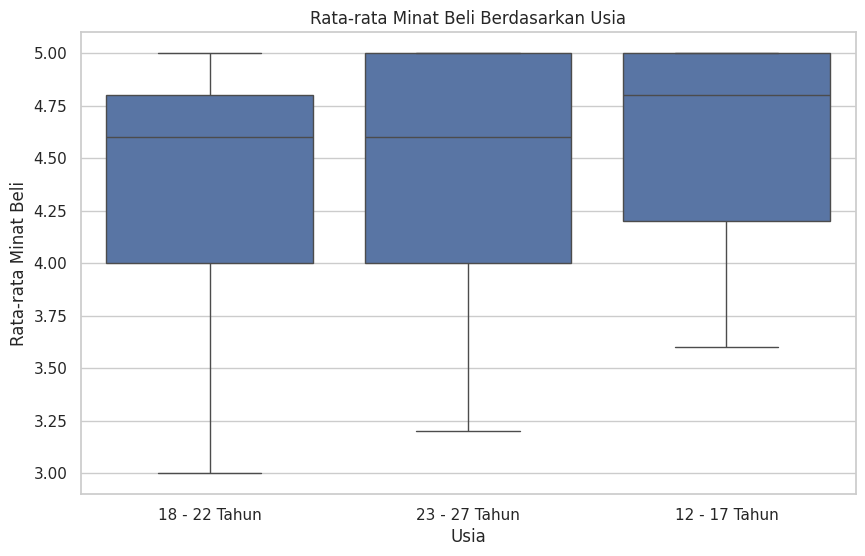

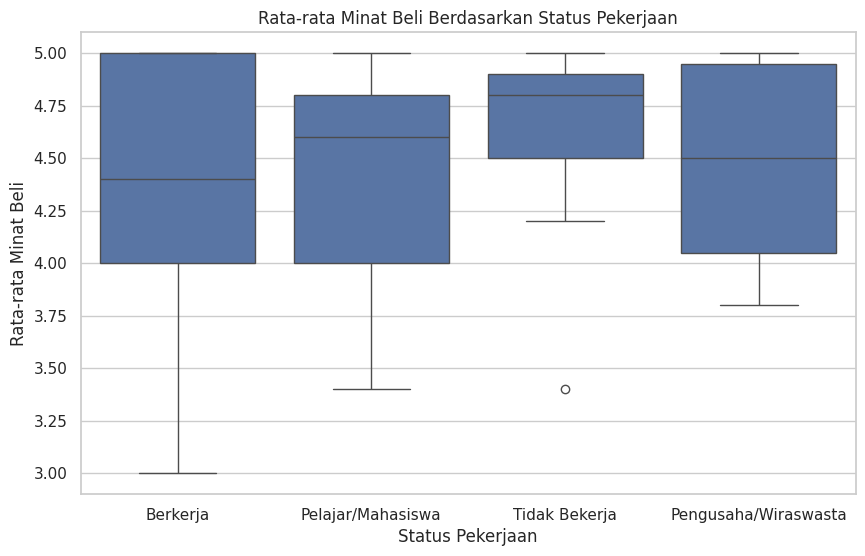

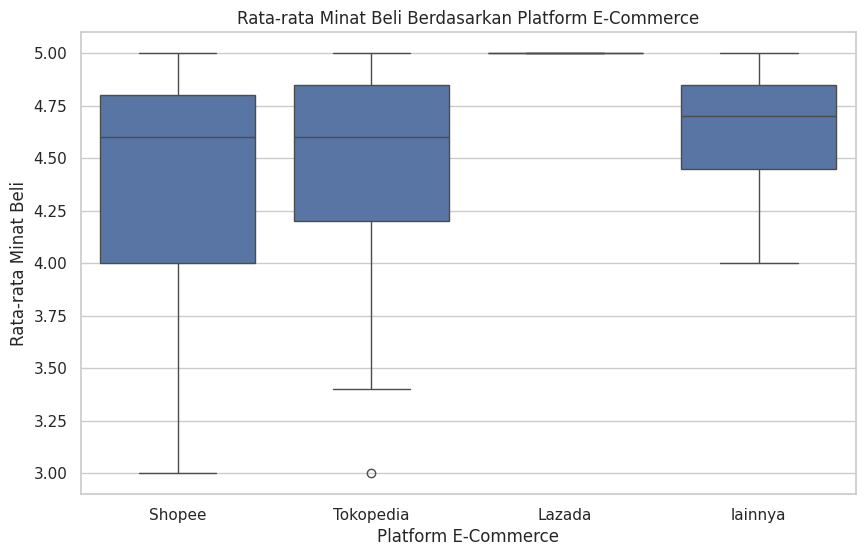

In [168]:
# Menghitung rata-rata minat beli
data['Rata_Rata_Minat_Beli'] = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].mean(axis=1)
data['Total_Minat_Beli'] = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].sum(axis=1)

# 1. Visualisasi Rata-rata Minat Beli Berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Jenis Kelamin', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

# 2. Visualisasi Rata-rata Minat Beli Berdasarkan Usia
plt.figure(figsize=(10, 6))
sns.boxplot(x='Usia', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

# 3. Visualisasi Rata-rata Minat Beli Berdasarkan Status Pekerjaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status Pekerjaan', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Status Pekerjaan')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

# 4. Visualisasi Rata-rata Minat Beli Berdasarkan Platform E-Commerce
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform E-Commerce', y='Rata_Rata_Minat_Beli', data=data)
plt.title('Rata-rata Minat Beli Berdasarkan Platform E-Commerce')
plt.xlabel('Platform E-Commerce')
plt.ylabel('Rata-rata Minat Beli')
plt.show()

Analisis Korelasi

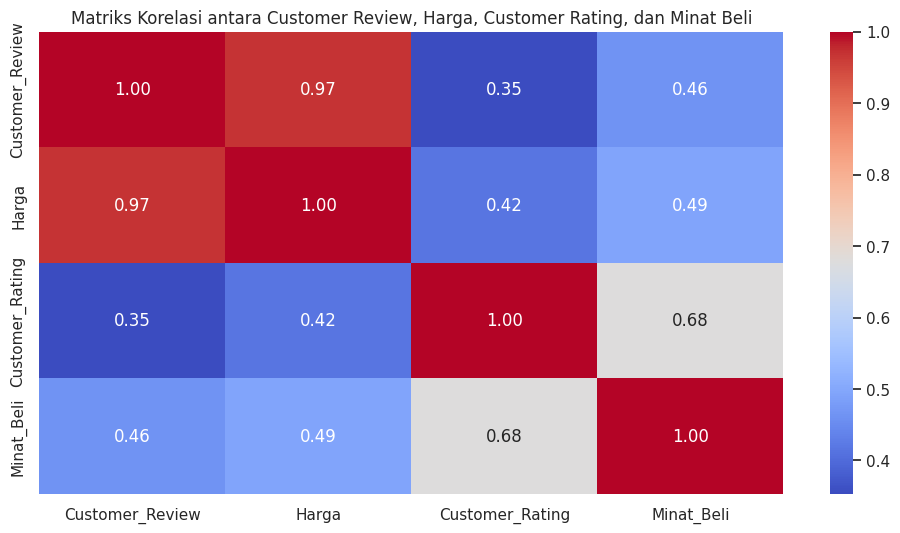

In [169]:
# Menghitung rata-rata untuk setiap kelompok
customer_review_avg = data[['X201', 'X202', 'X203', 'X204']].mean(axis=1)
harga_avg = data[['X201', 'X202', 'X203', 'X204', 'X205']].mean(axis=1)
customer_rating_avg = data[['X301', 'X302', 'X303', 'X304', 'X305']].mean(axis=1)
minat_beli_avg = data[['Y1', 'Y2', 'Y3', 'Y4', 'Y5']].mean(axis=1)

# Membuat DataFrame baru dengan hasil perhitungan
summary_df = pd.DataFrame({
    'Customer_Review': customer_review_avg,
    'Harga': harga_avg,
    'Customer_Rating': customer_rating_avg,
    'Minat_Beli': minat_beli_avg
})

# Menghitung matriks korelasi
correlation_matrix = summary_df.corr()

# Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi antara Customer Review, Harga, Customer Rating, dan Minat Beli')
plt.show()


Analisis Regresi

In [170]:
# 1. Menyiapkan data untuk regresi
X = summary_df[['Customer_Review', 'Harga', 'Customer_Rating']]
y = summary_df['Minat_Beli']

# 2. Menambahkan konstanta untuk model
X = sm.add_constant(X)

# 3. Membuat model regresi
model = sm.OLS(y, X).fit()

# 4. Menampilkan ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Minat_Beli   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     69.99
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           8.27e-31
Time:                        17:32:00   Log-Likelihood:                -77.603
No. Observations:                 200   AIC:                             163.2
Df Residuals:                     196   BIC:                             176.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5895      0.282     

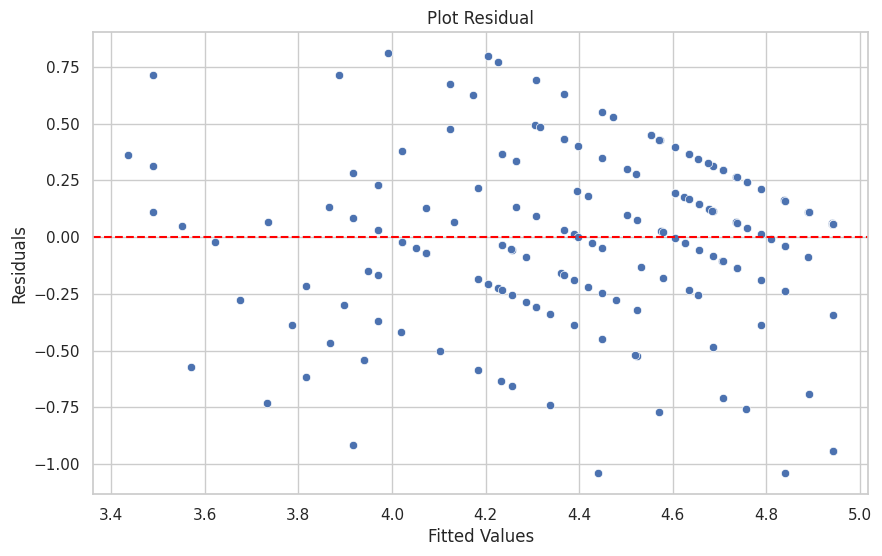

In [171]:
# Menghitung residual
residuals = model.resid

# Visualisasi residual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Plot Residual')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [172]:
predictions = model.predict(X)
summary_df['Predicted_Minat_Beli'] = predictions


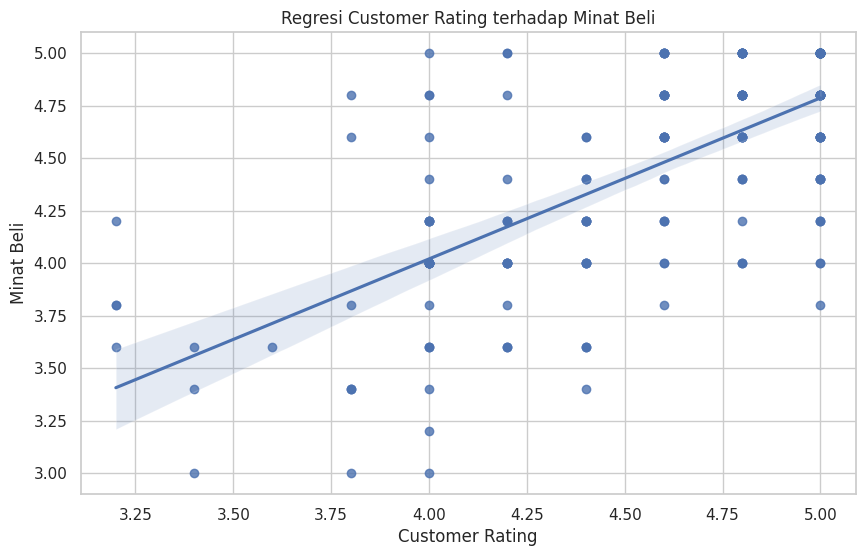

In [173]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Customer_Rating', y='Minat_Beli', data=summary_df)
plt.title('Regresi Customer Rating terhadap Minat Beli')
plt.xlabel('Customer Rating')
plt.ylabel('Minat Beli')
plt.show()
